In [202]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [25]:
spotify = pd.read_csv('/Users/skua/Downloads/top50.csv', encoding = "ISO-8859-1", index_col=0)

In [26]:
spotify.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [39]:
spotify = spotify.rename(columns={'Track.Name': 'TrackName', 
                        'Artist.Name': 'ArtistName', 
                        'Beats.Per.Minute': 'BeatsPerMinute',
                        'Loudness..dB..': 'Loudness',
                        'Valence.': 'Valence',
                        'Length.': 'Length',
                        'Acousticness..': 'Acousticness',
                        'Speechiness.': 'Speechiness'
                       })

In [41]:
spotify.head()

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


# Styles available

In [218]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# Normal Value Counts Plot

- Rot/X label Rotation = 45degree
- Kind = Bar
- Alpha = 0.5 degree of opacity

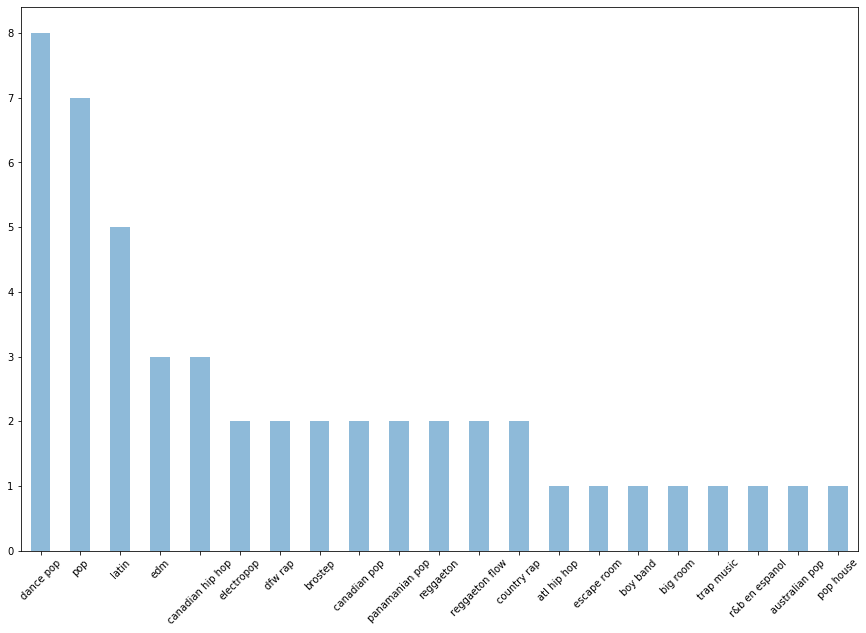

In [54]:
plt.figure(figsize=(15,10))
spotify.Genre.value_counts().plot(kind='bar', alpha=0.5, rot=45)


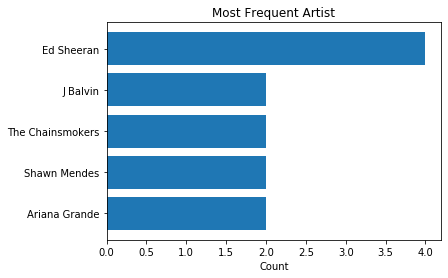

In [89]:
fig, ax = plt.subplots()
top5 = spotify.ArtistName.value_counts().nlargest(5)

ax.barh(top5.keys(), top5.values, align='center')
ax.set_yticks(top5.keys())
ax.set_yticklabels(top5.keys())
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Most Frequent Artist')

plt.show()

In [91]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
TrackName         50 non-null object
ArtistName        50 non-null object
Genre             50 non-null object
BeatsPerMinute    50 non-null int64
Energy            50 non-null int64
Danceability      50 non-null int64
Loudness          50 non-null int64
Liveness          50 non-null int64
Valence           50 non-null int64
Length            50 non-null int64
Acousticness      50 non-null int64
Speechiness       50 non-null int64
Popularity        50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


# GroupBy Plot Specific X and Y with Title

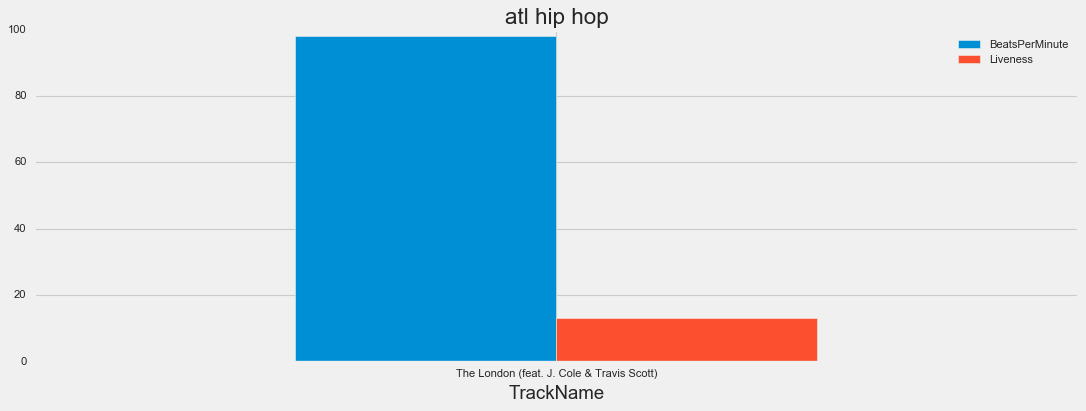

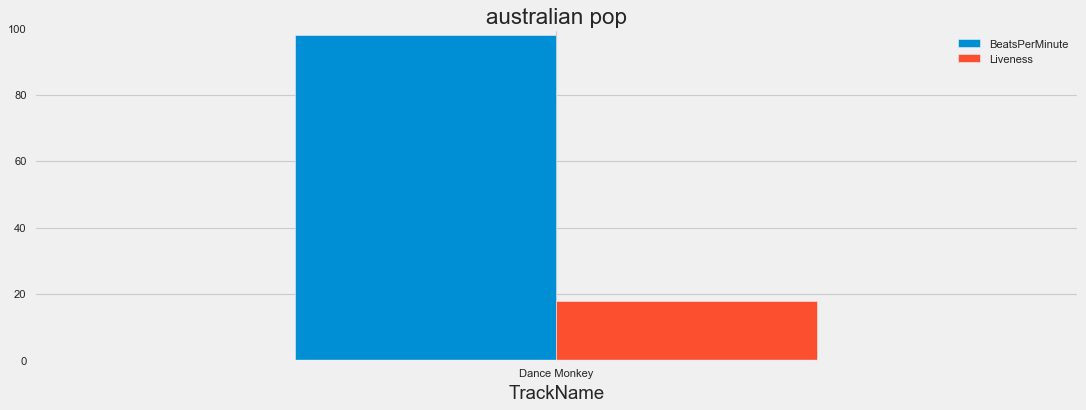

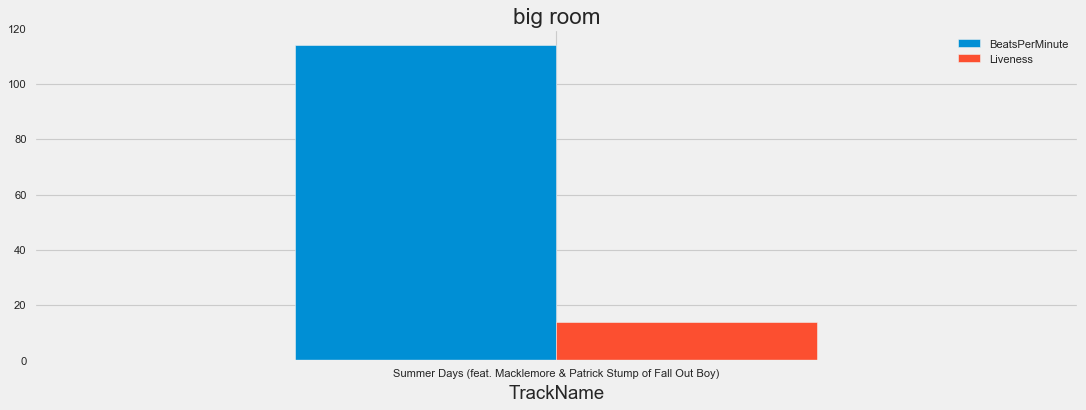

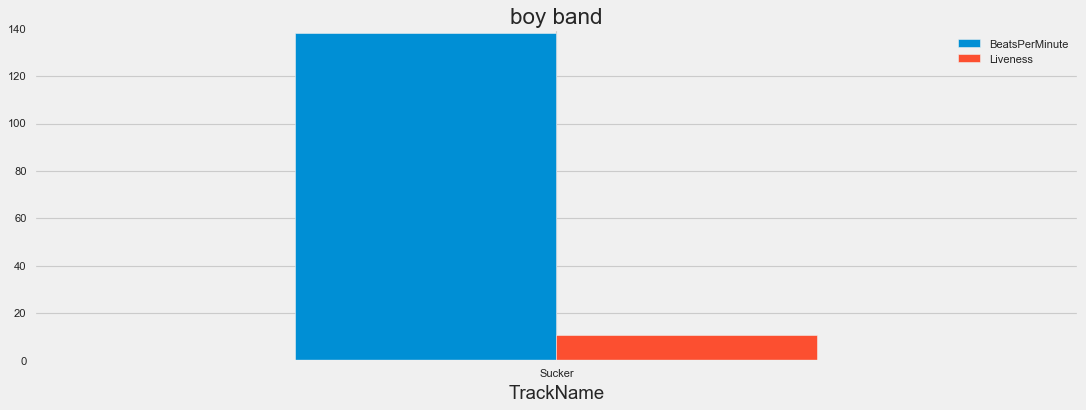

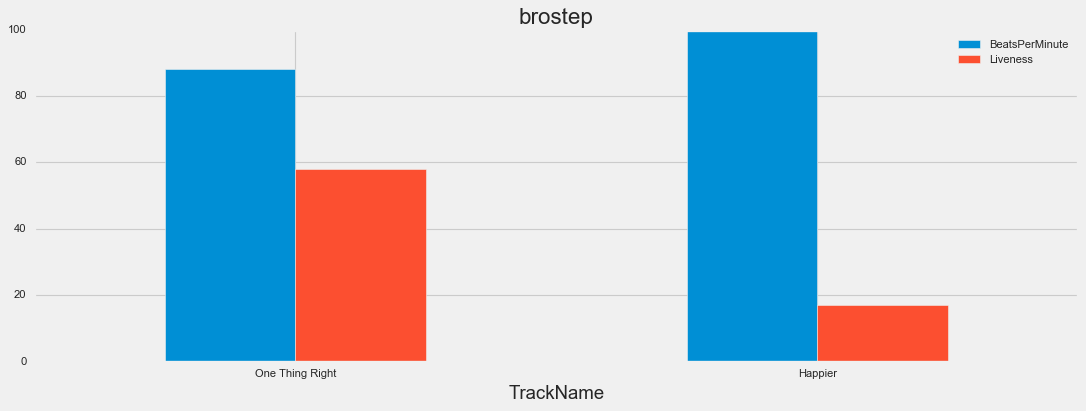

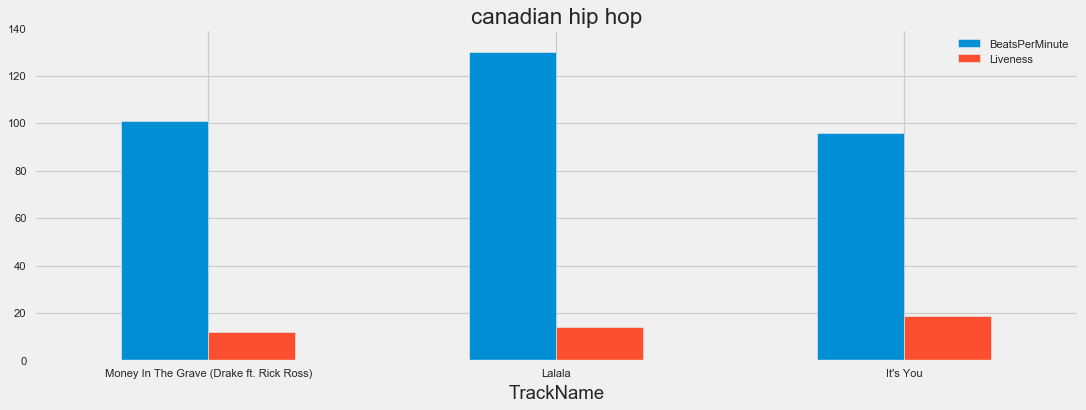

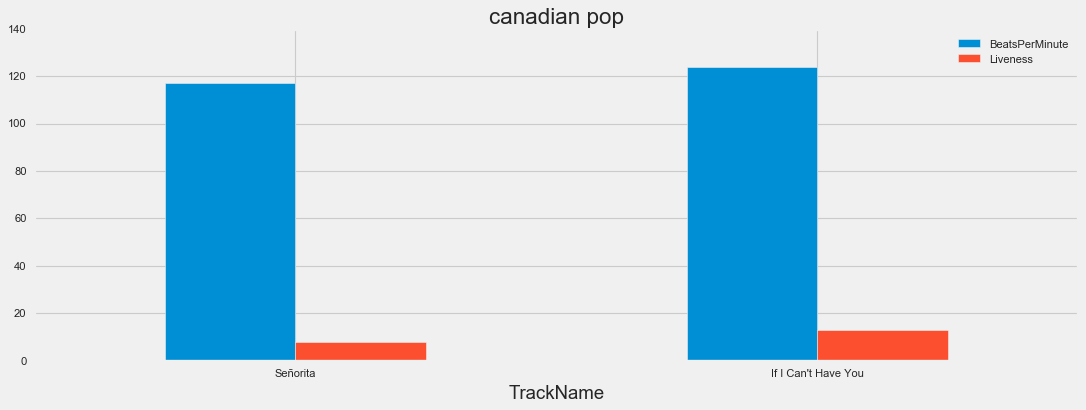

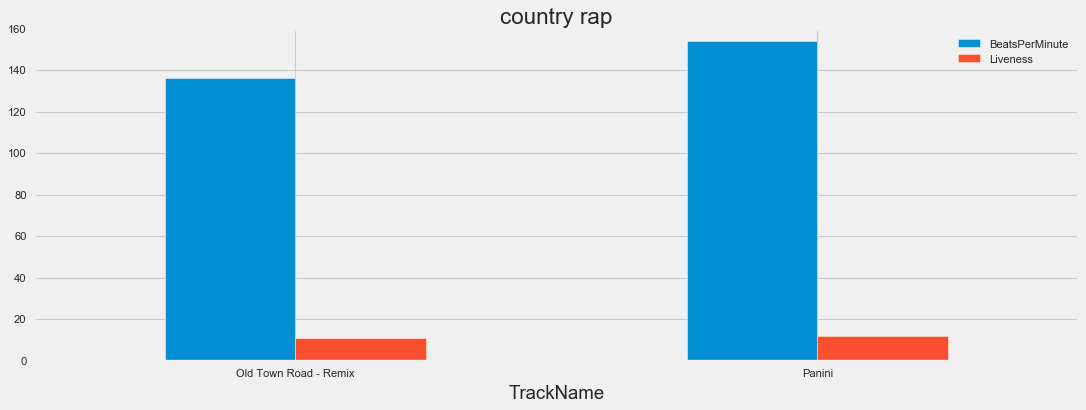

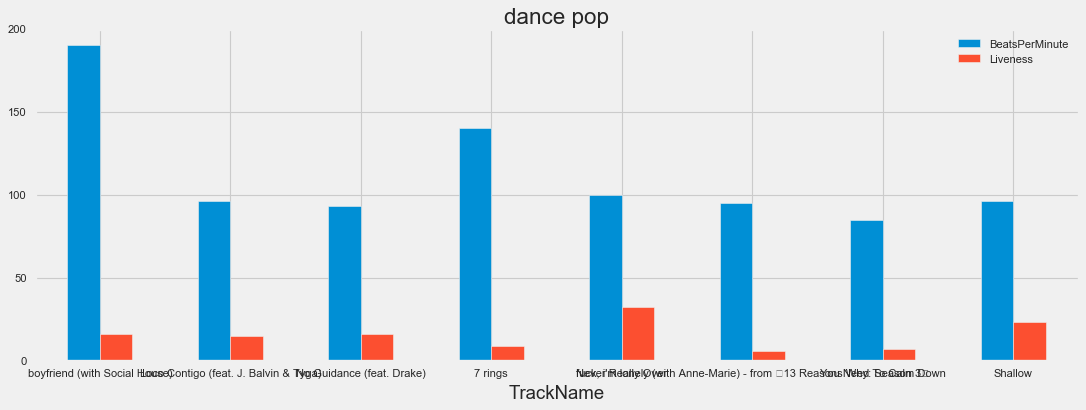

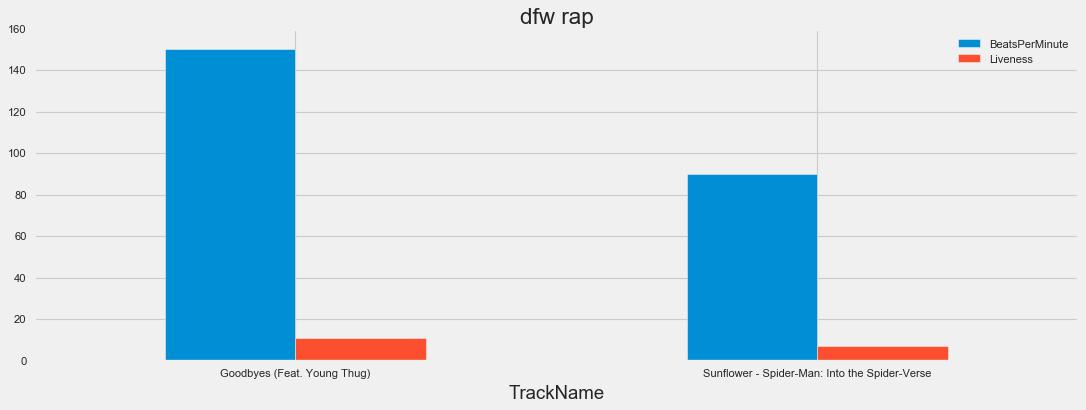

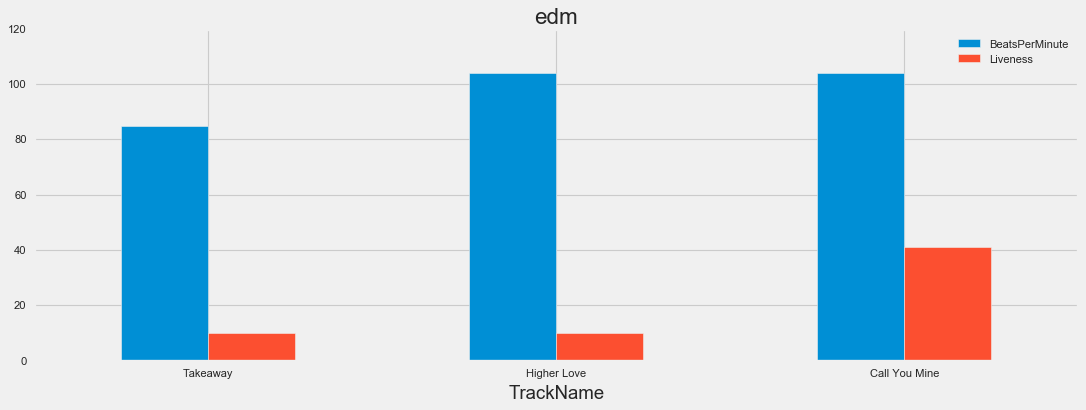

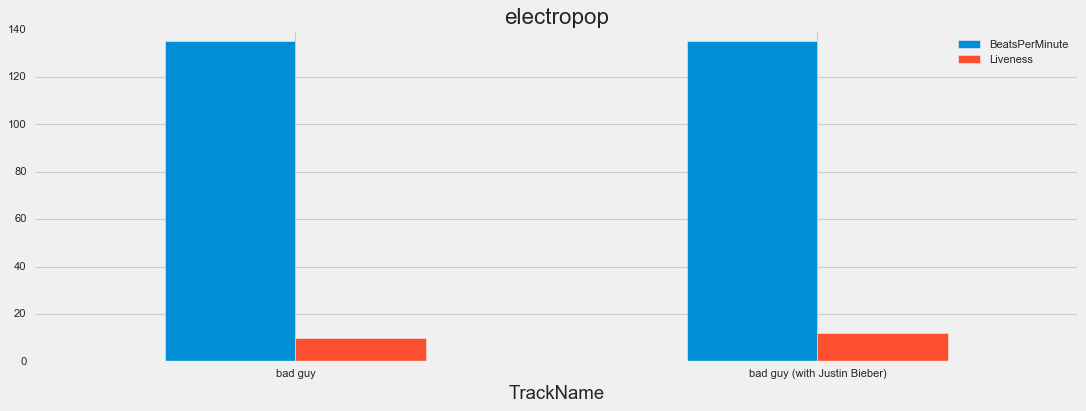

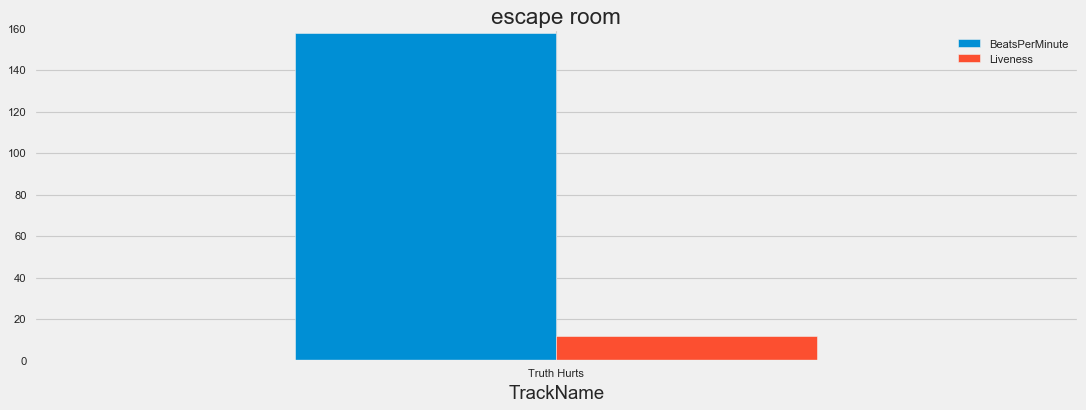

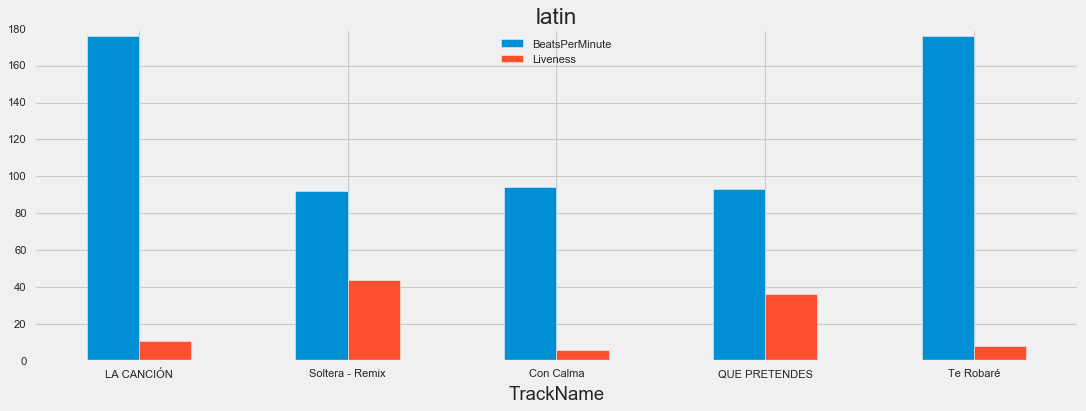

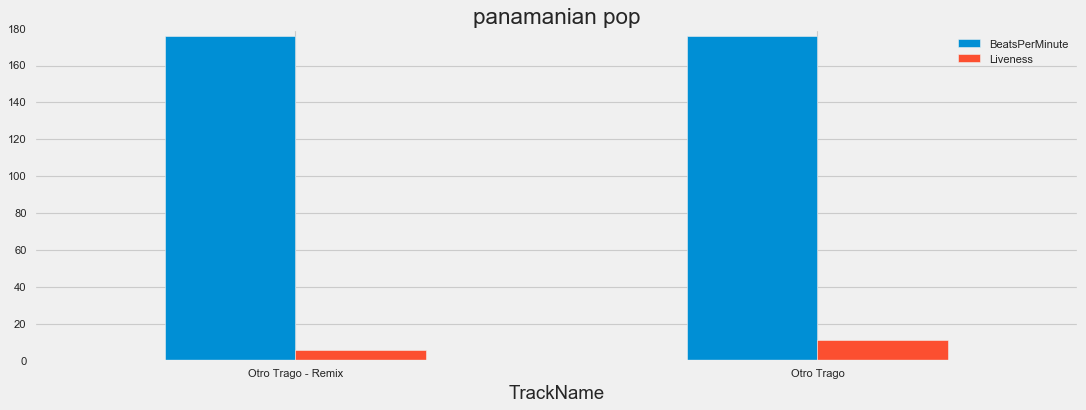

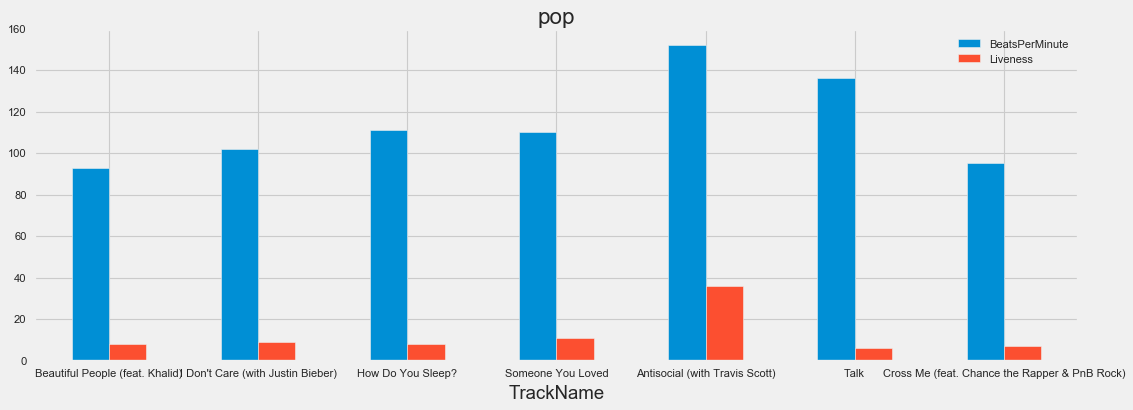

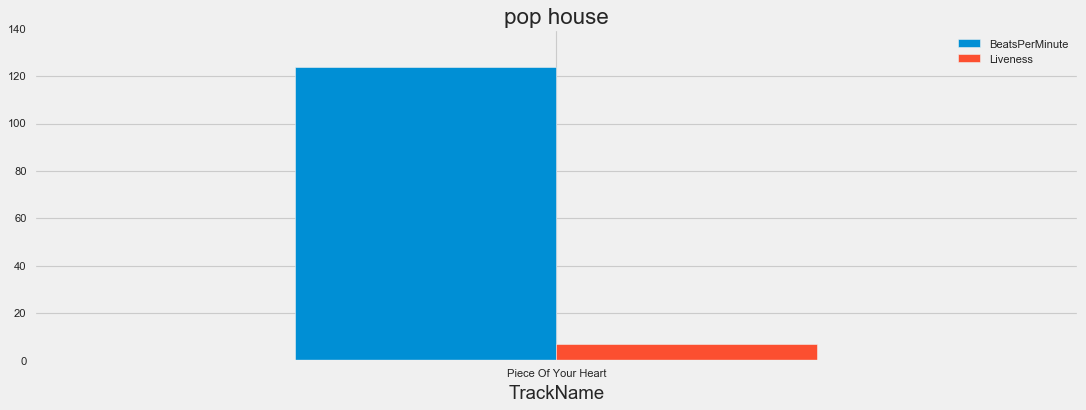

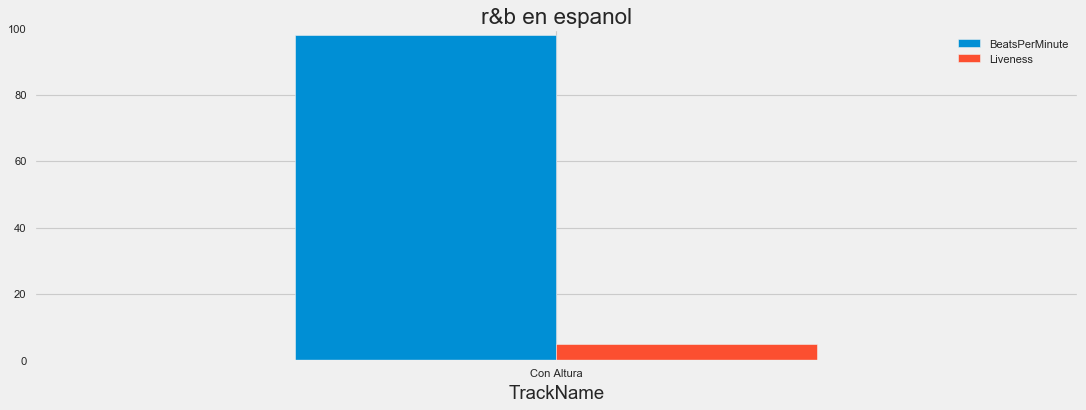

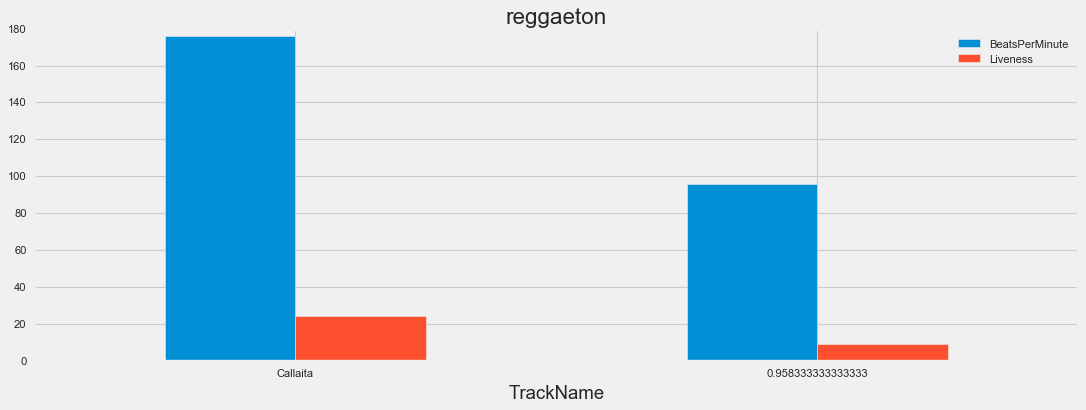

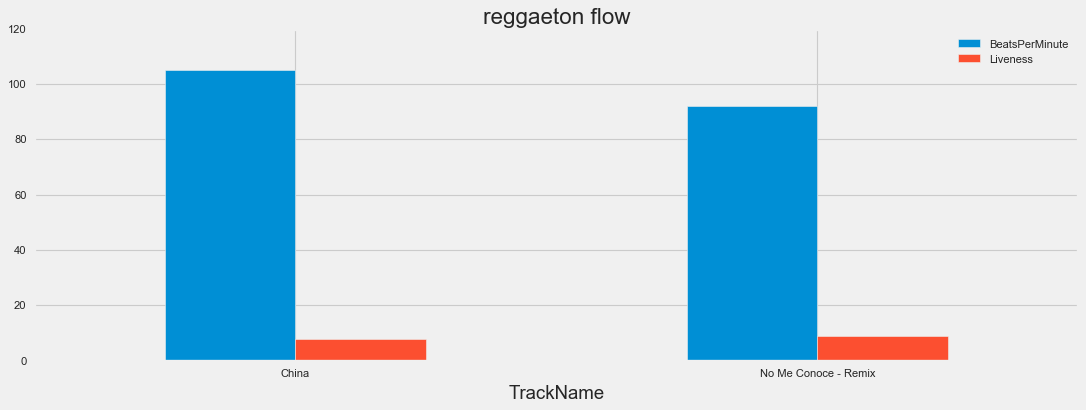

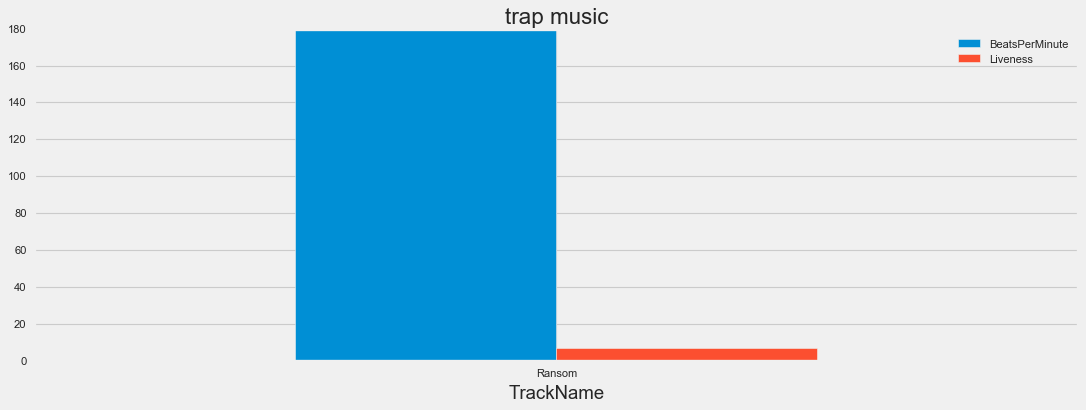

In [215]:
for title, group in spotify.groupby('Genre'):
    group.plot(kind='bar', x='TrackName', y=['BeatsPerMinute', 'Liveness'], figsize=(15, 5), rot=0, title=title)

# GroupBy Plot Specific X and Y without Title

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


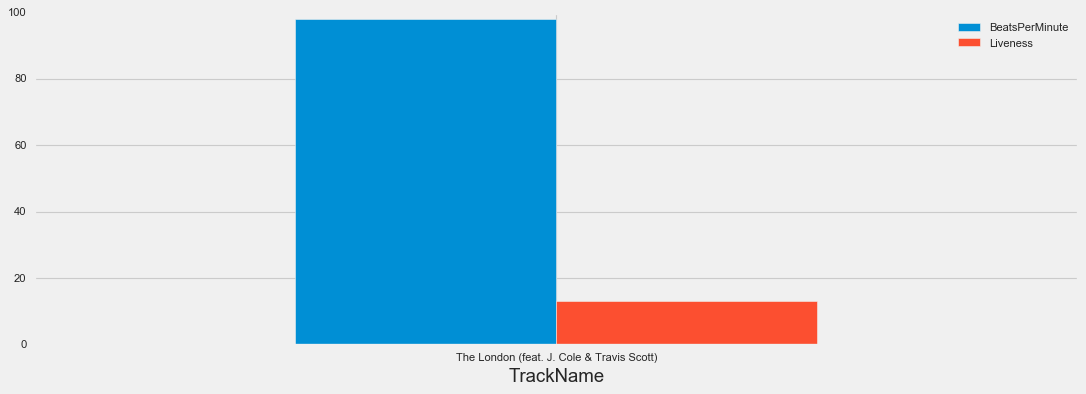

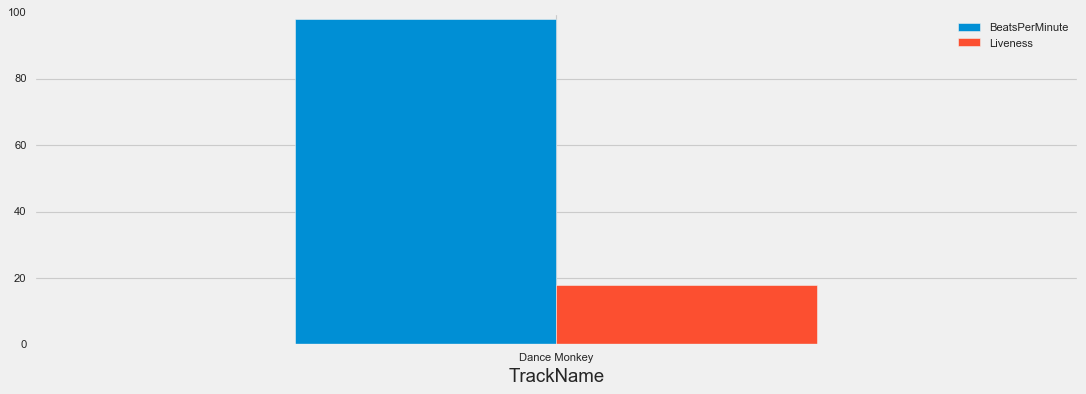

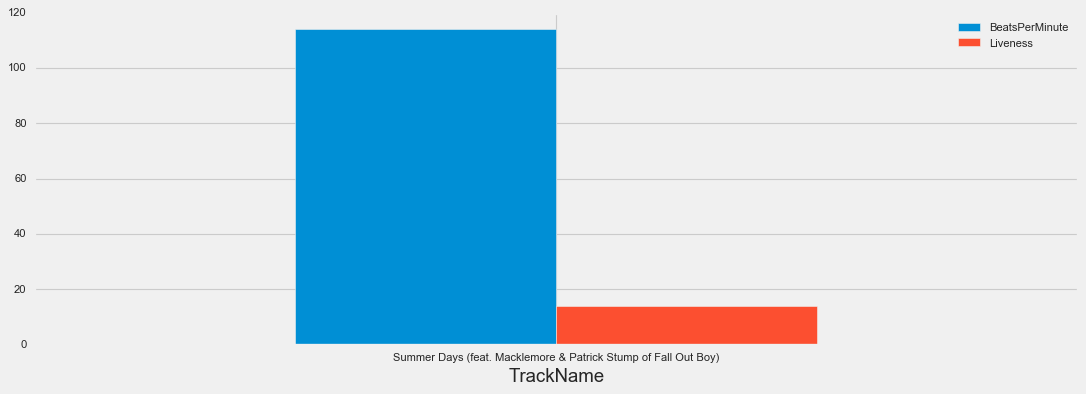

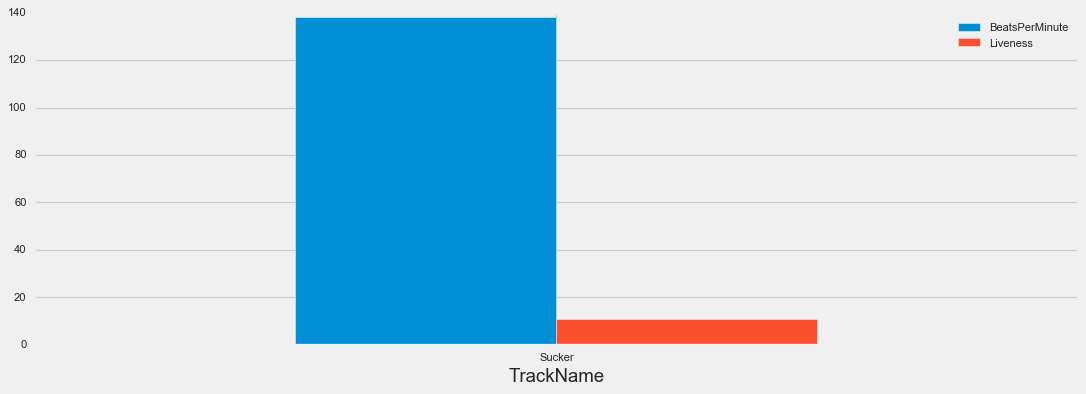

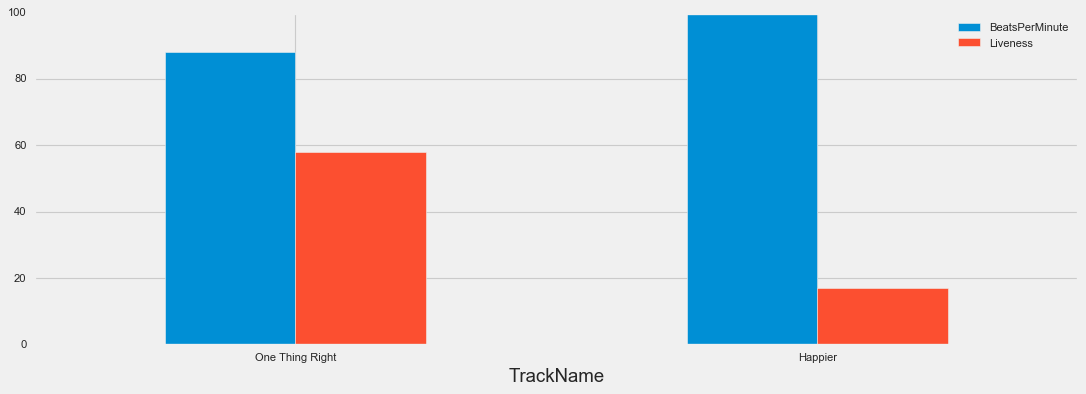

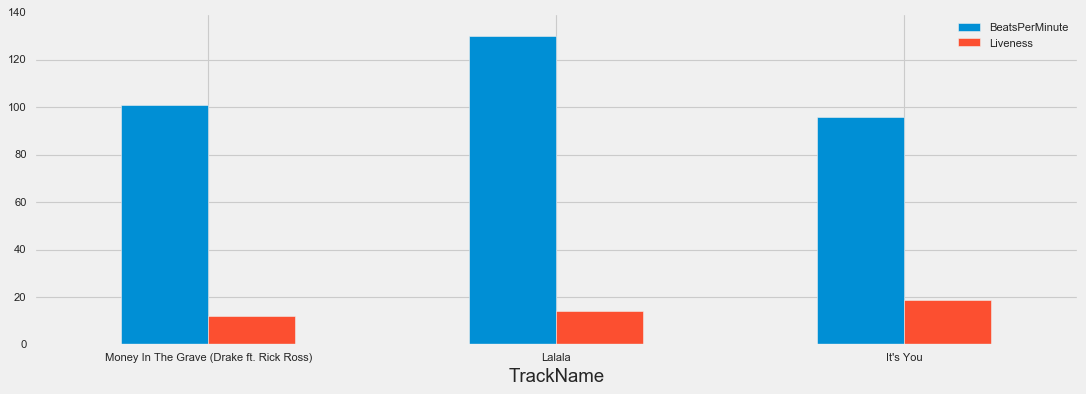

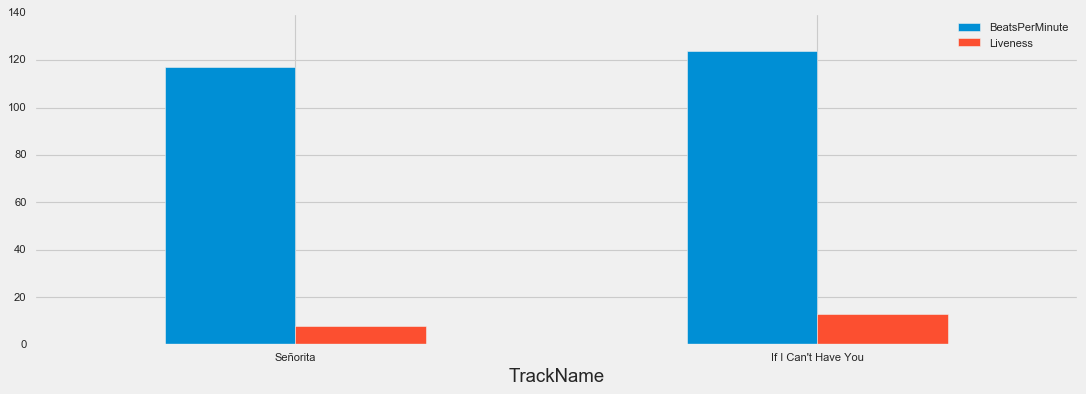

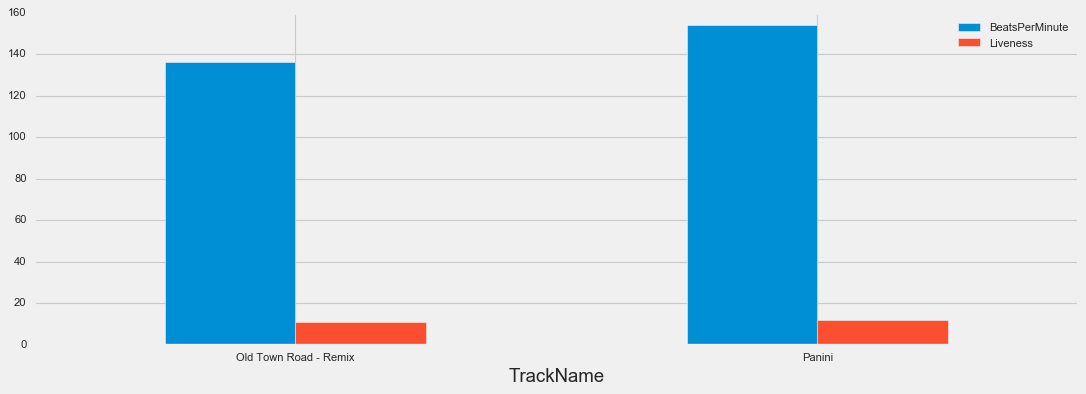

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


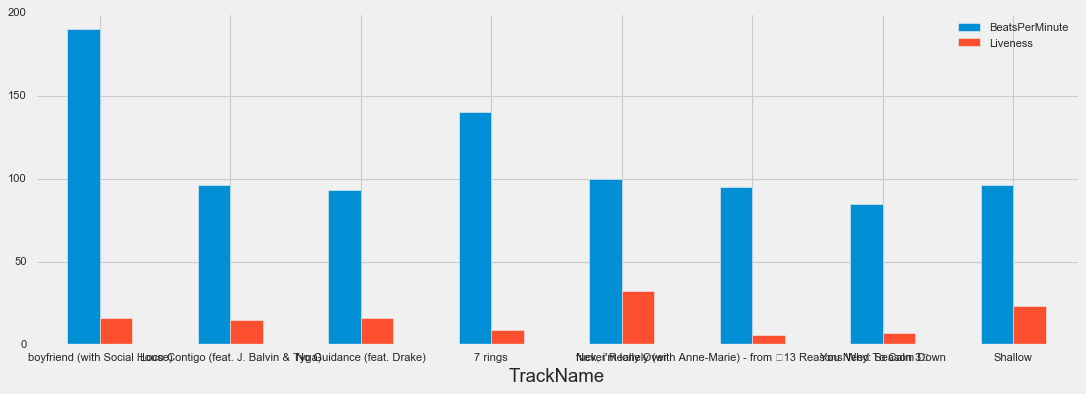

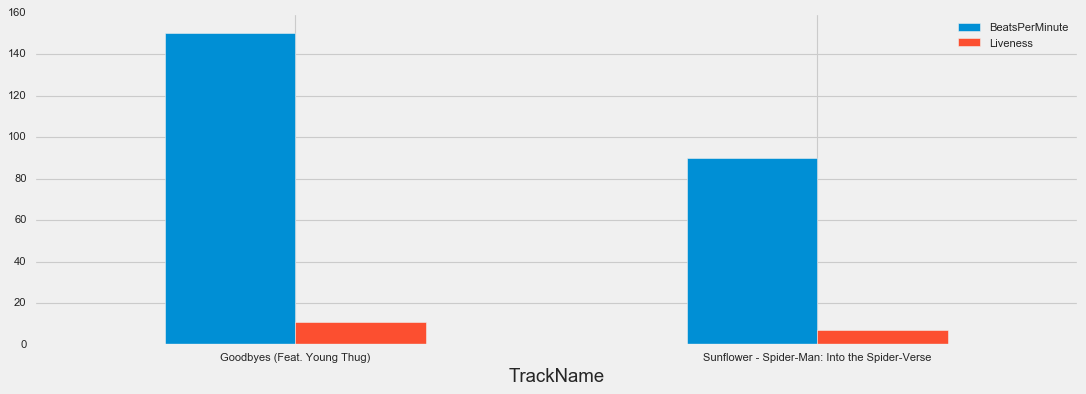

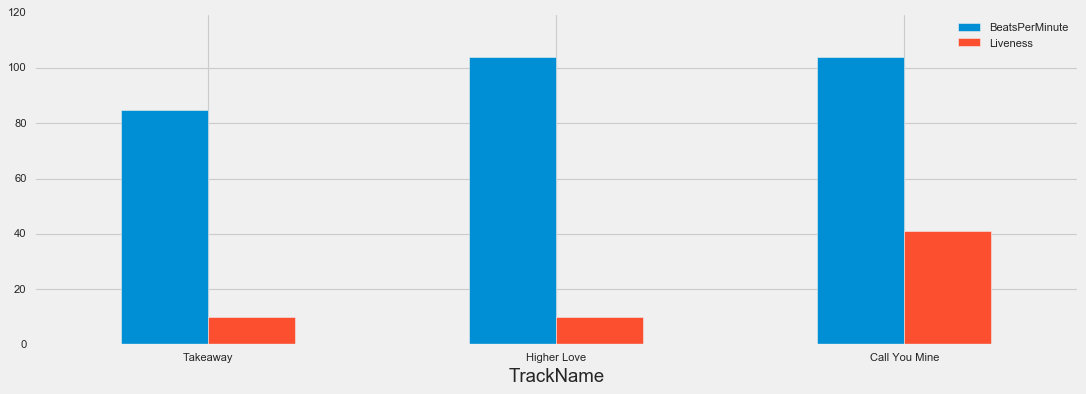

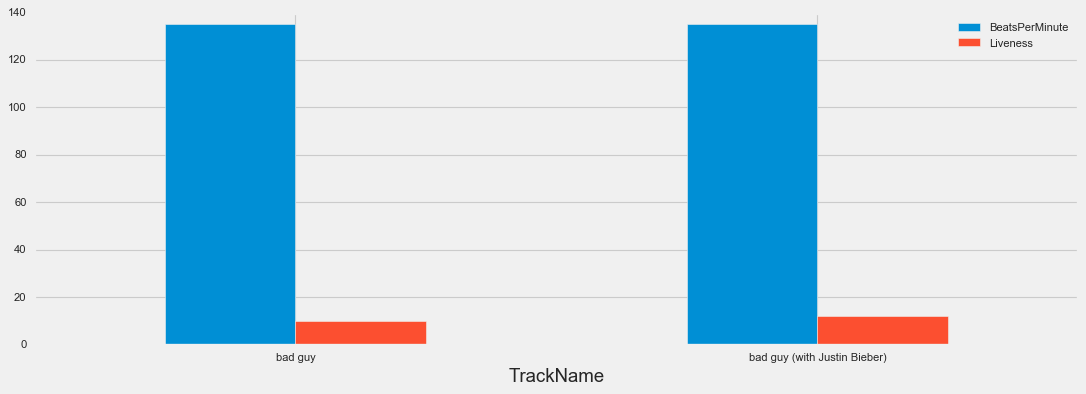

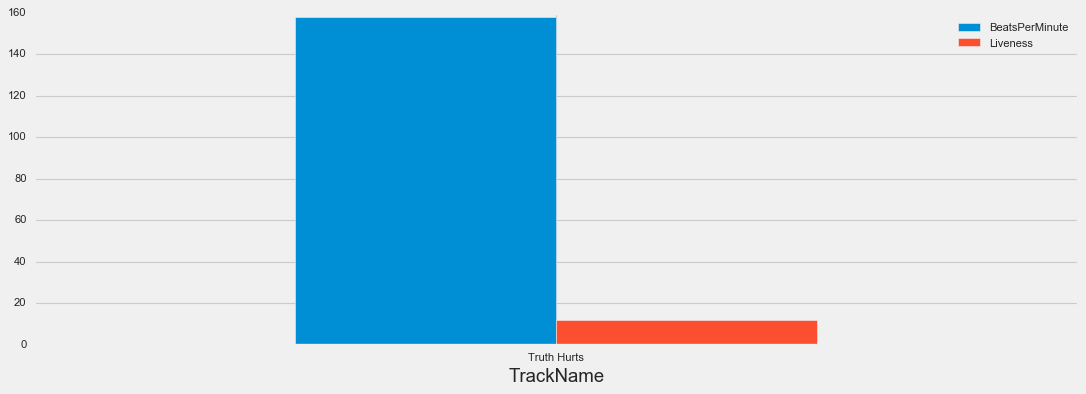

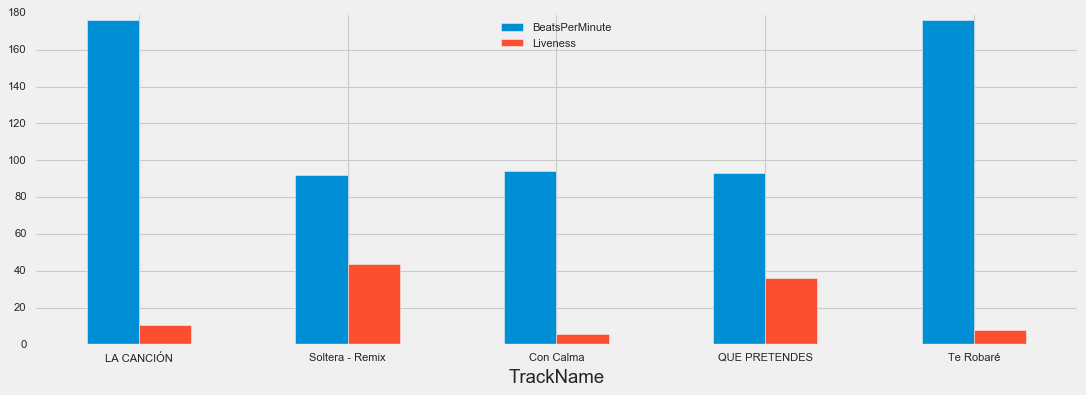

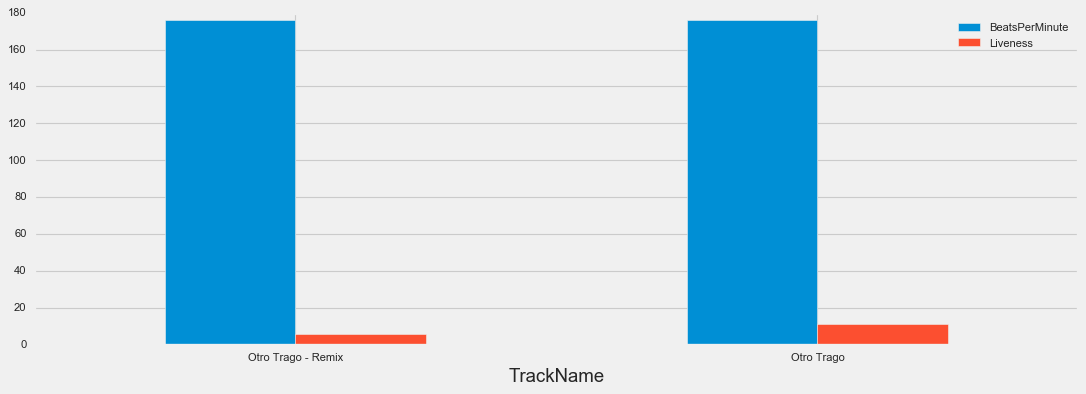

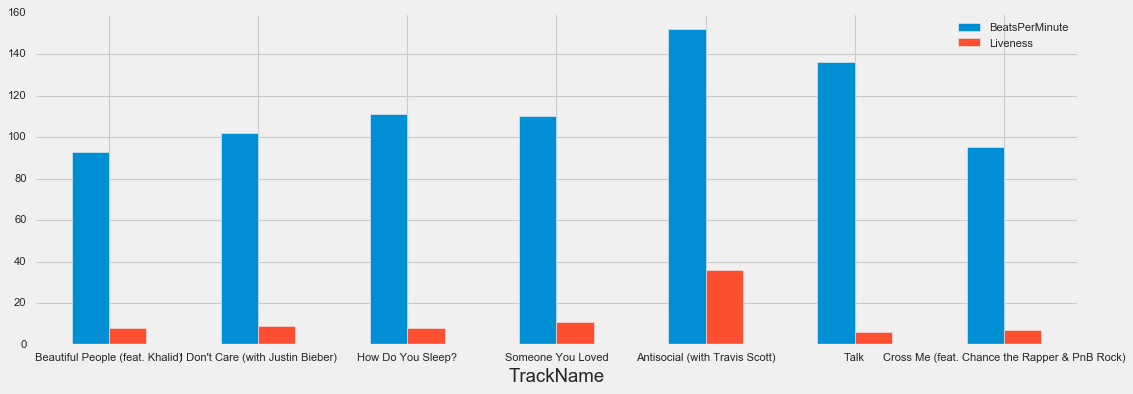

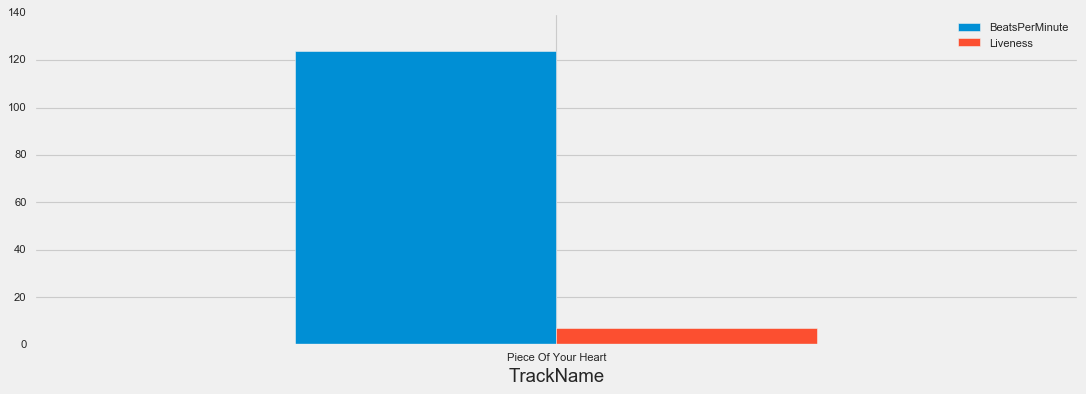

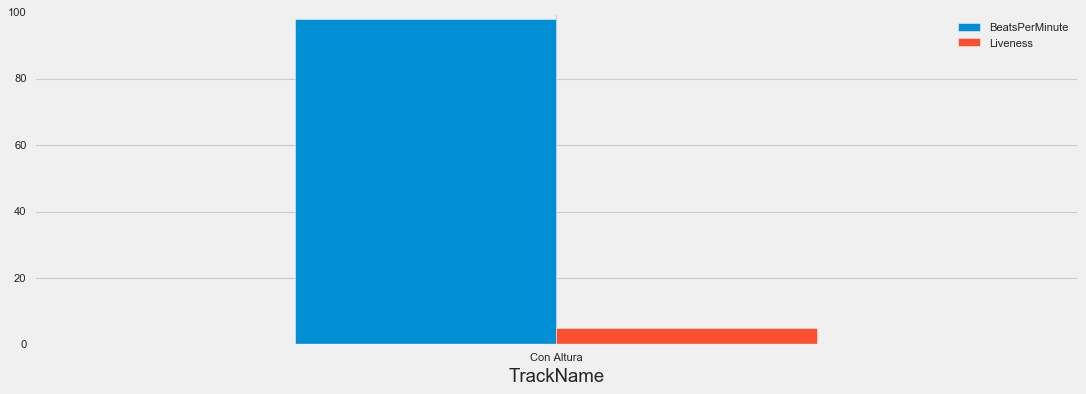

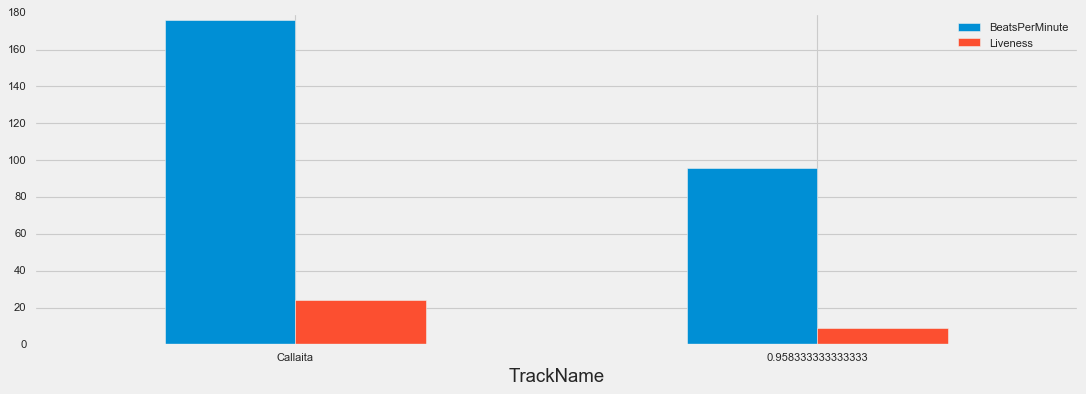

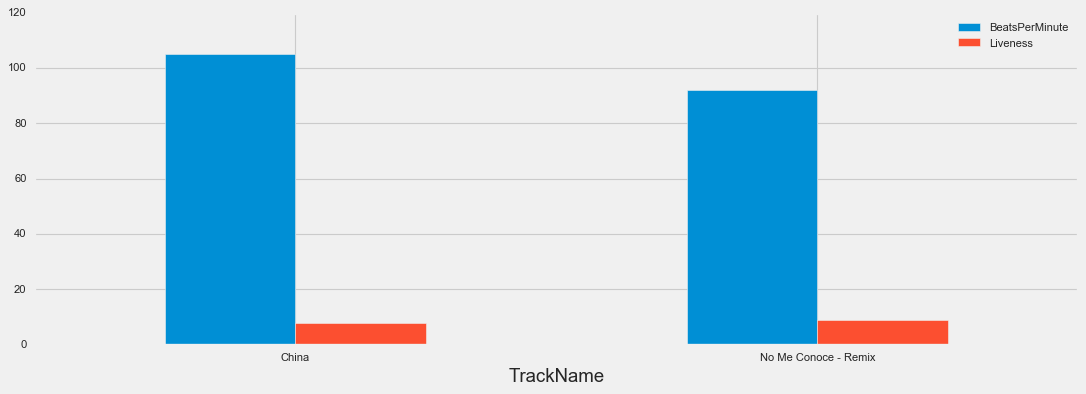

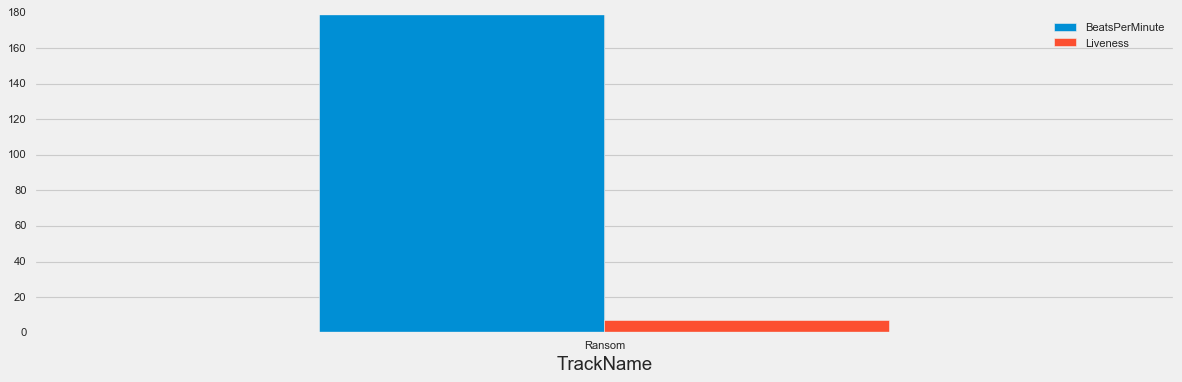

In [209]:
plt.style.use('fivethirtyeight')
spotify.groupby('Genre').plot(kind='bar',x='TrackName', y=['BeatsPerMinute', 'Liveness'], figsize=(15,5), rot=0)
plt.tight_layout()
plt.show()

# GroupBy Plot

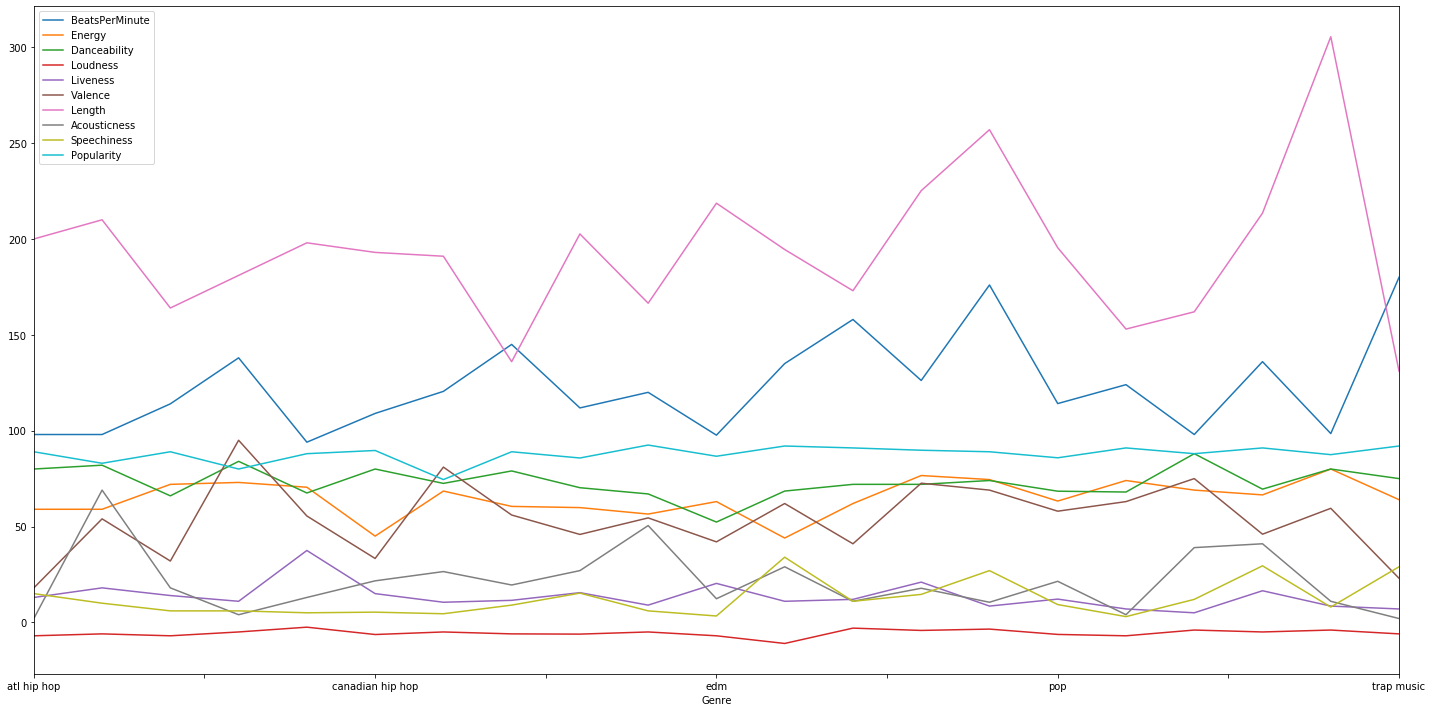

In [148]:
spotify.groupby('Genre').mean().plot(figsize=(20,10))
plt.tight_layout()
plt.show()

# GroupBy Subplots

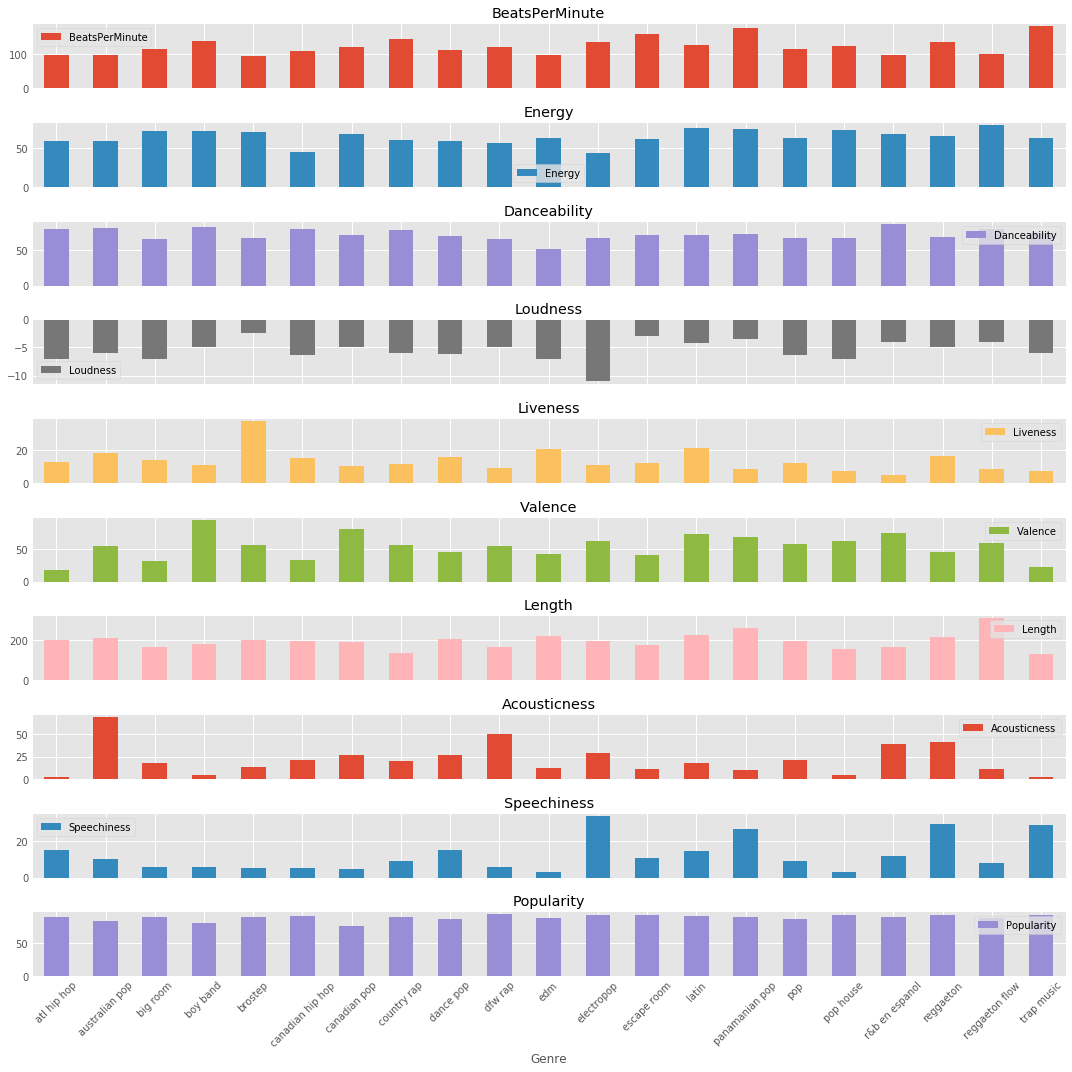

In [161]:
plt.style.use('ggplot')
spotify.groupby('Genre').mean().plot(kind='bar', subplots=True, figsize=(15,15), rot=45)
plt.tight_layout()
plt.show()


# Draw Line on Graph

In [167]:
dance = spotify.loc[spotify.Danceability > spotify.Danceability.mean()]

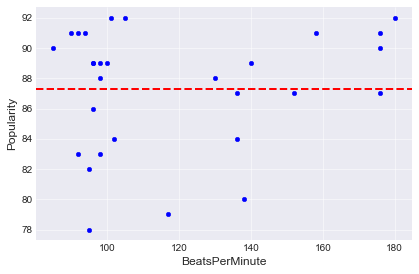

In [192]:
plt.style.use('seaborn-darkgrid')
ax = dance.plot(kind='scatter', x='BeatsPerMinute', y='Popularity')
ax.axhline(dance.Popularity.mean(), color='r', linestyle='--', lw=2)
plt.show()

# Manual Plot Multiple Graphs

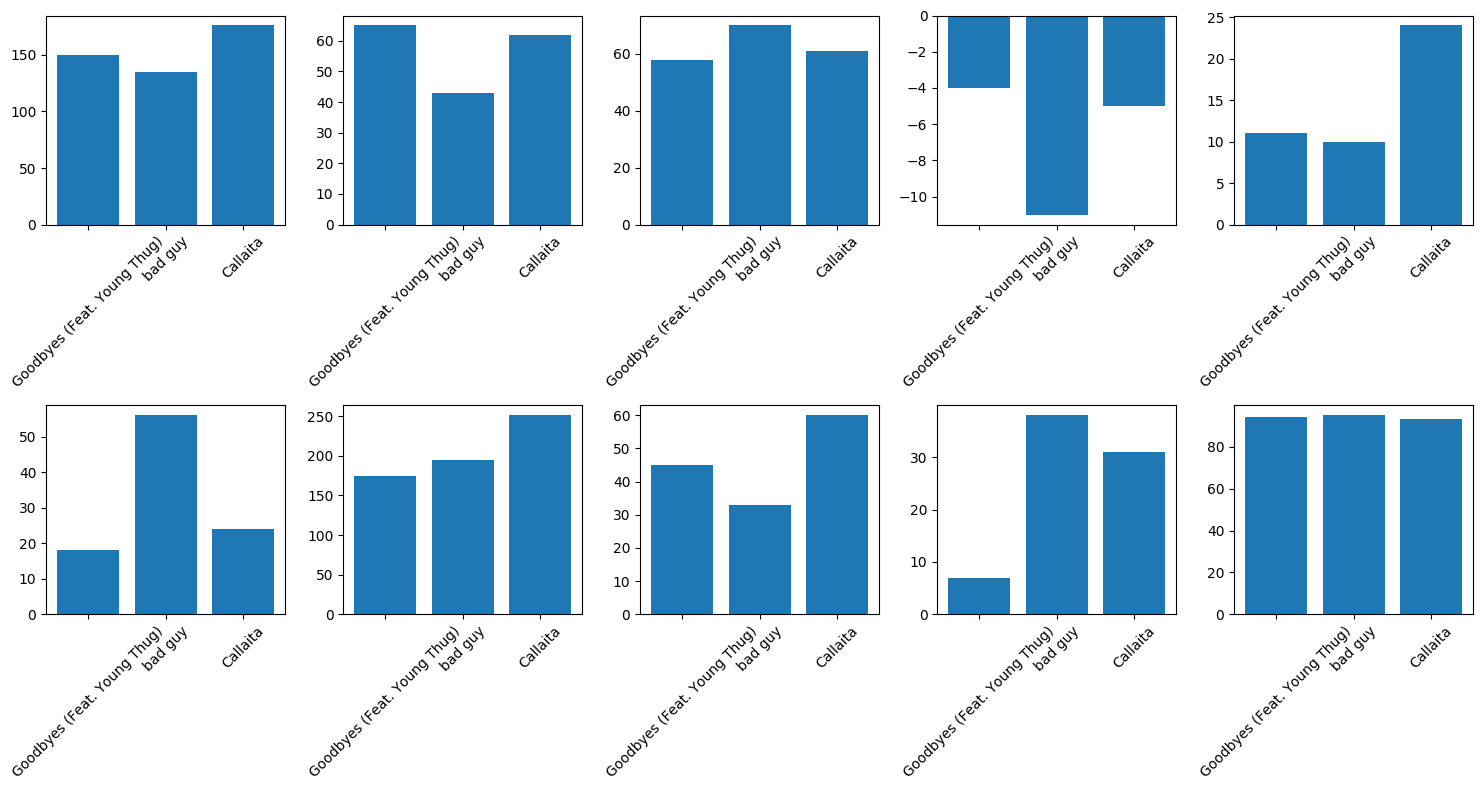

In [286]:
plt.style.use('default')

plt.figure(figsize=(15, 8))
y = popu.columns[3:]
popu = spotify.loc[spotify.Popularity > 92]
for x in range(1, 11):
    plt.subplot(2,5,x)
    plt.bar(popu.TrackName, popu[y[x-1]])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Different types of Plot Symbols

- dash(-/--)
- o
- ^
- s = square
- h = hexagon
- 1,2 = triangles

Combine with your desired colors
1. r = red
2. b = blue
- etc..

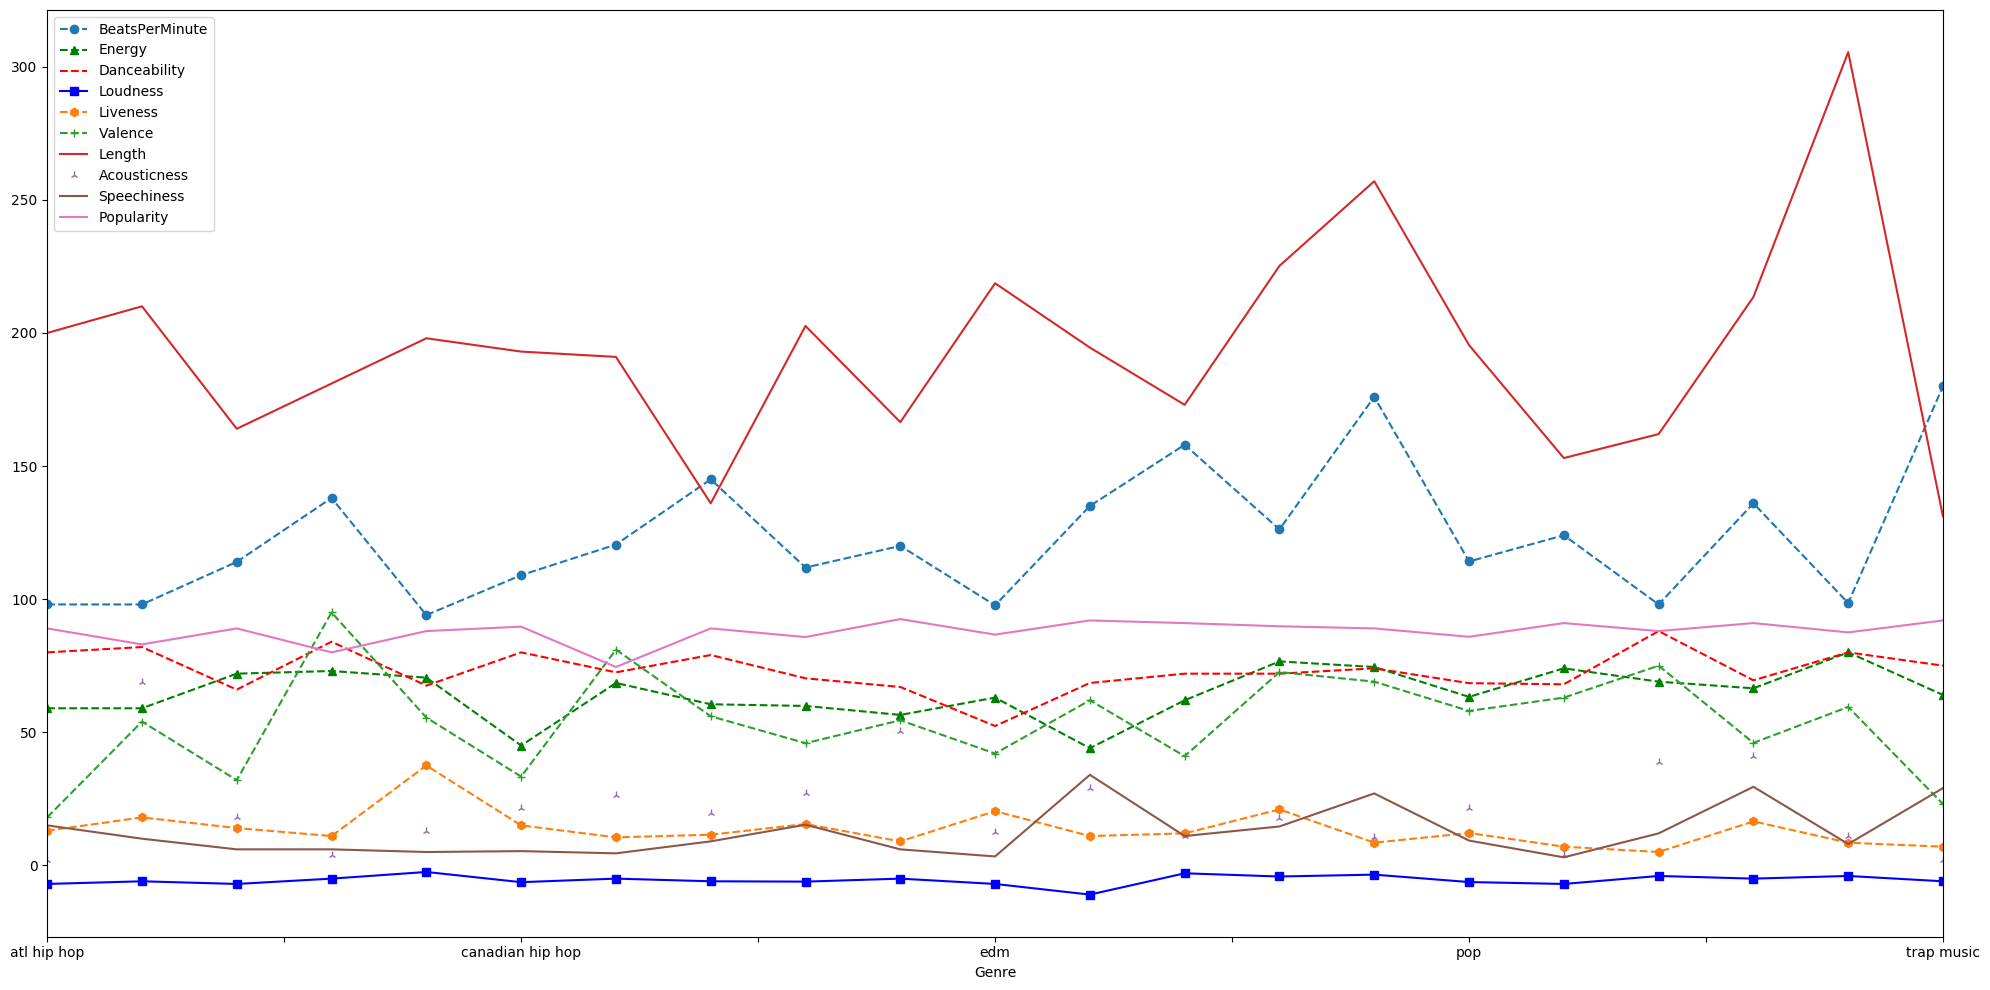

In [303]:
spotify.groupby('Genre').mean().plot(figsize=(20,10), style=['--o', '--g^', 'r--', '-bs', '--h', '--+', '-', '2'])
plt.tight_layout()
plt.show()